### Image Hashing 
Lets say u have 1000 images of cat, of which few are identical and few are not. Now can we identify which all images are duplicate of one another?
Identifying duplicates withi image dataset is different then that of in textual data. Here comes Image Hashing into picture. 
Image hash is a fingerprint of an image. If hash of any two image comes out to be identical(or very similar) we consider them duplicates and drop them 

In [1]:
from PIL import Image 
import imagehash
import os

In [4]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Create directory for our dataset
dataset_dir = 'mnist_subset'
os.makedirs(dataset_dir, exist_ok=True)

# Download MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int')

# Let's select 20 images from the dataset
# We'll pick 18 random images and make 2 duplicates
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(X), 18, replace=False)

# Save the 18 random images
print("Saving 18 random MNIST images...")
for i, idx in enumerate(indices):
    img_array = X[idx].reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(img_array)
    img.save(f'{dataset_dir}/mnist_{i}.png')

# Create 2 duplicates
print("Creating 2 duplicates...")
# Duplicate 1: exact copy
shutil.copy(f'{dataset_dir}/mnist_5.png', f'{dataset_dir}/mnist_18.png')

# Duplicate 2: slightly modified (add minor noise)
img = Image.open(f'{dataset_dir}/mnist_10.png')
img_array = np.array(img)
# Add slight noise
noise = np.random.randint(-10, 10, img_array.shape, dtype=np.int16)
img_array = np.clip(img_array.astype(np.int16) + noise, 0, 255).astype(np.uint8)
similar_img = Image.fromarray(img_array)
similar_img.save(f'{dataset_dir}/mnist_19.png')

print("Dataset created successfully with 20 images (18 unique + 2 duplicates/similar)")

Saving 18 random MNIST images...
Creating 2 duplicates...
Dataset created successfully with 20 images (18 unique + 2 duplicates/similar)


In [6]:
image_hashes = {} # dictionary to store image hashees

dataset_dir = "/Users/meetsudra/Documents/GitHub/deeplearning/datasets/mnist_subset"

for filename in os.listdir(dataset_dir):
    if filename.endswith(('.png','.jpg','.jpeg')):
        image_path = os.path.join(dataset_dir,filename)
        image = Image.open(image_path)

        # creating hash value for image
        hash_value = imagehash.phash(image)
        image_hashes[filename] = hash_value
        print("Image:"+filename+",phash:"+str(hash_value))

Image:mnist_10.png,phash:981a674d38e63667
Image:mnist_11.png,phash:9b643c34d3934ecc
Image:mnist_13.png,phash:8f3661693c9627cc
Image:mnist_12.png,phash:92692d1a70e2cf8f
Image:mnist_16.png,phash:9932746dc6b2b8cc
Image:mnist_17.png,phash:986c339966b3649b
Image:mnist_15.png,phash:9ba4347368ce6699
Image:mnist_14.png,phash:9b3366cd31b29869
Image:mnist_4.png,phash:9a33646933ce9999
Image:mnist_5.png,phash:961c69c93766da32
Image:mnist_7.png,phash:895b76a47873874c
Image:mnist_6.png,phash:8e6f319463999966
Image:mnist_2.png,phash:9e6b31346ec96493
Image:mnist_3.png,phash:99736439339c99cc
Image:mnist_1.png,phash:9b66683996cb6394
Image:mnist_0.png,phash:9634655b38c366cd
Image:mnist_8.png,phash:996666383699c6cd
Image:mnist_9.png,phash:996c6cd2e63b9894
Image:mnist_19.png,phash:981a674d38e63667
Image:mnist_18.png,phash:961c69c93766da32


phash (perceptual hash) is a fingerprint based on images'svisual characteristics

1. it converts image to greyscale 
2. resized to fixed dimensions 32*32 or 8*8
    to simplyify processing, this keeps the important details while rmoving the unnecessary ones.
3. apply discrete cosine transform
    we break the image into frequency components (patterns of change)
4. extract low-frequency components
    focus only on the core structure (the bright areas in the DCT image)
5. binary hash
    convert the 8×8 DCT values into a binary pattern (black/white pixels)
6. Hexadecimal Representation
    

In [7]:
# function to find duplicates 

def find_duplicates(image_hashes, threshold=5):
    duplicates = []
    filenames = list(image_hashes.keys())

    for i in range(len(filenames)):
        for j in range(i+1, len(filenames)):
            hash1 = image_hashes[filenames[i]]
            hash2 = image_hashes[filenames[j]]
            diff = hash1 - hash2
            if diff<=threshold:
                duplicates.append((filenames[i], filenames[j], diff))
    return duplicates

In [8]:
find_duplicates(image_hashes,threshold=5)

[('mnist_10.png', 'mnist_19.png', 0), ('mnist_5.png', 'mnist_18.png', 0)]

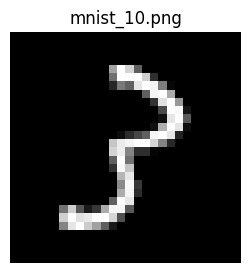

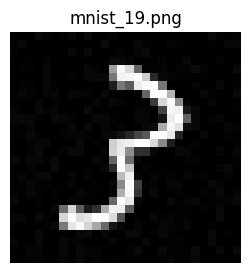

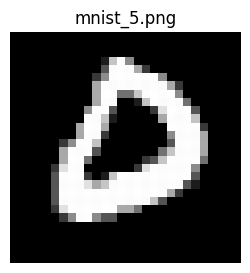

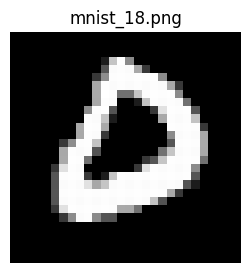

In [12]:
selected_images = ["mnist_10.png", "mnist_19.png", "mnist_5.png", "mnist_18.png"]

# Display images one by one
for img_name in selected_images:
    img_path = os.path.join(dataset_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap="gray")
    plt.title(img_name)
    plt.axis("off")
    plt.show()


# Dupicate images 